<Axes: ylabel='genres'>

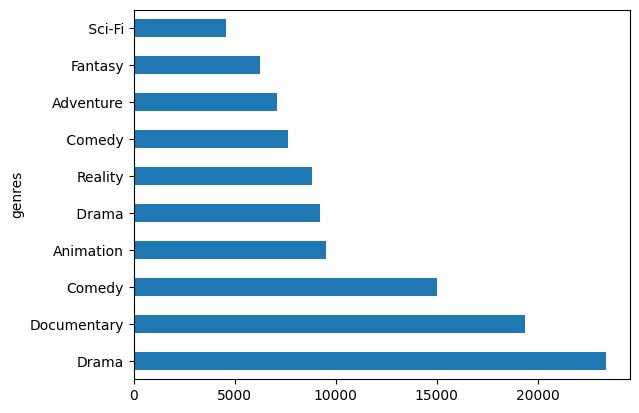

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_tv_dataset_v3.csv')

movie['genres'] = movie['genres'].str.replace('[\[\]\'\']', '', regex=True)
movie['genres'] = movie['genres'].str.split(',')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(' & ')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(', ')
movie = movie.explode('genres')

movie['genres'].value_counts()[:10].plot(kind='barh')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_tv_dataset_v3.csv')

movie['genres'] = movie['genres'].str.replace('[\[\]\'\"]', '', regex=True)
movie['genres'] = movie['genres'].str.split(',')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(' & ')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(', ')
movie = movie.explode('genres')

movie['genres'].value_counts().to_frame('Quantidade')

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_Test.csv')

movie.head()

movie['genres'].value_counts().to_frame('Quantidade')

,Quantidade
genres,
"['Horror', 'Thriller']",9
['Horror'],7
"['Action', 'Adventure', 'Science Fiction']",5
['Action'],4
"['Action', 'Thriller']",4
...,...
"['Animation', 'Drama', 'Adventure', 'Fantasy']",1
"['Action', 'Adventure', 'Science Fiction', 'Fantasy']",1
"['Family', 'Animation', 'Fantasy']",1


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_tv_dataset_v3.csv')

movie['genres'] = movie['genres'].str.replace('[\[\]\'\"]', '', regex=True)
movie['genres'] = movie['genres'].str.split(',')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(' & ')
movie = movie.explode('genres')
movie['genres'] = movie['genres'].str.split(', ')
movie = movie.explode('genres')

movie['genres'].value_counts()

genres
Drama           23384
Documentary     19370
Comedy          15028
Animation        9521
 Drama           9208
Reality          8837
 Comedy          7628
Adventure        7108
Fantasy          6226
 Sci-Fi          4582
 Family          3819
 Action          3777
 Mystery         3383
 Crime           3377
Action           3331
Crime            3287
Family           2472
 Kids            2440
Talk             2211
 Animation       2156
Mystery          1725
Politics         1713
 Reality         1651
Sci-Fi           1644
Kids             1616
 Documentary     1397
 War             1273
News             1234
Soap             1145
 Talk             854
 Soap             853
War               440
 News             362
Western           227
 Romance          176
 Western          107
Music              43
 History           32
 Music             27
History            12
Romance             7
Musical             1
Name: count, dtype: int64

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_tv_dataset_v3.csv')

movie['genres'] = movie['genres'].str.split(', ')


def recommend_movies_by_genre(input_genre, min_popularity=5000,num_recommendations=5, exclude_adult=True):
    # Filtrar filmes que têm o gênero de entrada
    filtered_movies = movie[movie['genres'].apply(lambda x: input_genre in x if isinstance(x, list) else False)]
    recommendations = filtered_movies.sample(num_recommendations)

    if exclude_adult:
        filtered_movies = filtered_movies[filtered_movies['adult'] == False]

    if filtered_movies.empty:
        print(f"Nenhum filme encontrado no gênero '{input_genre}'")
        return


    recommended_movies = filtered_movies.sort_values(by='popularity', ascending=False).head(num_recommendations)

    return recommended_movies

genre_dict = {
    1: 'Action',2: 'Drama',3: 'Fantasy',4: 'Documentary',5: 'Comedy',6: 'Animation',7: 'Romance',8: 'Horror',9: 'Thriller',10: 'Crime',11: 'Music',12: 'TV Movie',13: 'Family',14: 'Adventure',15: 'Mystery',16: 'History',17: 'Science Fiction',18: 'War',19: 'Western',
    # Adicione mais gêneros conforme necessário
}


print("Selecione um gênero:")
for num, genre in genre_dict.items():
    print(f"{num}. {genre}")

selected_genre = None
while selected_genre not in genre_dict:
    try:
        selected_genre = int(input("\n Digite o número do gênero desejado: "))
    except ValueError:
        pass

input_genre = genre_dict[selected_genre]


recommendations = recommend_movies_by_genre(input_genre)

if recommendations is not None:
    print(f"=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\nRecomendações de filmes no gênero '{input_genre}':")
    print(recommendations[['name', 'popularity']])

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

movie = pd.read_csv('/workspaces/Projeto_IA/BD/TMDB_Test.csv')

movie['genres'] = movie['genres'].str.split(',')


def recommend_movies_by_genre(input_genre,num_recommendations=5):

    filtered_movies = movie[movie['genres'].apply(lambda x: input_genre in x if isinstance(x, list) else False)]


    if filtered_movies.empty:
        print(f"Nenhum filme encontrado no gênero '{input_genre}'")
        return


    recommendations = filtered_movies.sample(num_recommendations)

    return recommendations

genre_dict = {
    1: 'Action',2: 'Drama',3: 'Fantasy',4: 'Documentary',5: 'Comedy',6: 'Animation',7: 'Romance',8: 'Horror',9: 'Thriller',10: 'Crime',11: 'Music',12: 'Adventure',13: 'Mystery',14: 'Sci-Fi'
}

print("Selecione um gênero:")
for num, genre in genre_dict.items():
    print(f"{num}. {genre}")

selected_genre = None
while selected_genre not in genre_dict:
    try:
        selected_genre = int(input("\n Digite o número do gênero desejado: "))
    except ValueError:
        pass

input_genre = genre_dict[selected_genre]

recommendations = recommend_movies_by_genre(input_genre)

if recommendations is not None:
    print(f"=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\nRecomendações de filmes no gênero '{input_genre}':")
    print(recommendations[['name']])

Selecione um gênero:
1. Action
2. Drama
3. Fantasy
4. Documentary
5. Comedy
6. Animation
7. Romance
8. Horror
9. Thriller
10. Crime
11. Music
12. Adventure
13. Mystery
14. History
15. Sci-Fi


ValueError: Cannot take a larger sample than population when 'replace=False'